In [228]:
import numpy as np
from matplotlib import pyplot as plt

In [229]:
N_candidates = 5

dt                        = 1.0
multiplier                = 1.0
radicalization_multiplier = 0.2
radius                    = 0.2
exponent                  = 3

candidates = np.arange(0, N_candidates)
X = np.concatenate((np.arange(0, N_candidates), np.arange(0, N_candidates)))
Y = np.concatenate((np.zeros(N_candidates),     np.ones(N_candidates)))

In [230]:
def overtoon_distance(distance):
    normalized_distance = abs(distance/N_candidates)
    if normalized_distance > radius:
        normalized_distance = (radius - normalized_distance)/(1.0 - radius)
        return -(-normalized_distance)**exponent
    else:
        normalized_distance = (radius - normalized_distance)/radius
        return (normalized_distance)**exponent

In [231]:
def compute_flux(proportions, election_mean_political_position):
    fluxes = np.zeros((2*N_candidates, 2*N_candidates))
    proportions_variations = np.zeros(2*N_candidates)

    mean_political_position = 0
    for icandidate in range(N_candidates):
        mean_political_position += icandidate*(proportions[icandidate] + proportions[N_candidates+icandidate])
    
    for icandidate in range(N_candidates):
        flux                = dt*multiplier*overtoon_distance(icandidate - election_mean_political_position)
        radicalization_flux = radicalization_multiplier*flux
        
        if radicalization_flux > 0:
            radicalization_flux *= proportions[icandidate]
            
            fluxes[icandidate, N_candidates+icandidate]     +=  radicalization_flux
            proportions_variations[             icandidate] += -radicalization_flux
            proportions_variations[N_candidates+icandidate] +=  radicalization_flux
        else:
            radicalization_flux *= proportions[N_candidates+icandidate]

            fluxes[N_candidates+icandidate, icandidate]     += -radicalization_flux
            proportions_variations[             icandidate] += -radicalization_flux
            proportions_variations[N_candidates+icandidate] +=  radicalization_flux
        
        if flux < 0:
            flux *= proportions[icandidate]
            if mean_political_position > icandidate:
                fluxes[icandidate, icandidate+1]     += -flux
                proportions_variations[icandidate]   +=  flux
                proportions_variations[icandidate+1] += -flux
            else:
                fluxes[icandidate, icandidate-1]     += -flux
                proportions_variations[icandidate]   +=  flux
                proportions_variations[icandidate-1] += -flux

    return proportions_variations, fluxes

In [235]:
proportions = np.random.rand(N_candidates*2)
proportions[N_candidates:] *= proportions[:N_candidates]/5
proportions /= np.sum(proportions)

In [236]:
mean_polititcal_view = 2.2

proportions_variations, fluxes = compute_flux(proportions, mean_polititcal_view)

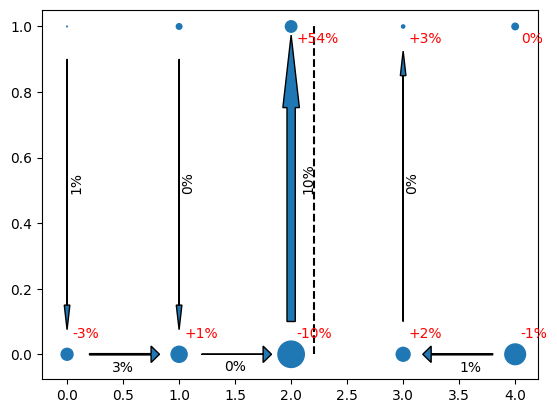

In [239]:
plt.scatter(X,Y,s=proportions*1000)
plt.plot([mean_polititcal_view, mean_polititcal_view], [0, 1], "k--")

epsilon = 1e-5
for icandidate in range(N_candidates):
    if abs(proportions_variations[icandidate]) > epsilon:
        proportional_var = proportions_variations[icandidate]/proportions[icandidate]
        plt.text(icandidate+0.05, 0.05, f"{ '+' if proportional_var > epsilon else '' }{ round(proportional_var*100) }%",
                 color="r")
    
    if abs(proportions_variations[N_candidates+icandidate]) > epsilon:
        proportional_var = proportions_variations[N_candidates+icandidate]/proportions[N_candidates+icandidate]
        plt.text(icandidate+0.05, 0.95, f"{ '+' if proportional_var > epsilon else '' }{ round(proportional_var*100) }%",
                 color="r")
        
    if fluxes[icandidate, N_candidates+icandidate] > epsilon:
        proportional_var = fluxes[icandidate, N_candidates+icandidate]/proportions[icandidate]
        
        width      = 2*fluxes[icandidate, N_candidates+icandidate]
        head_width = max(width*2, 0.05)
        
        
        plt.arrow(icandidate, 0.1, 0, 0.8 - head_width,
                  width=width, head_width=head_width)
        plt.text(icandidate+0.02+width, 0.5, f"{ round(proportional_var*100) }%",
                 rotation="vertical")
        
    elif fluxes[N_candidates+icandidate, icandidate] < 1e-5:
        proportional_var = fluxes[N_candidates+icandidate, icandidate]/proportions[N_candidates+icandidate]
        
        width      = 2*fluxes[N_candidates+icandidate, icandidate]
        head_width = max(width*2, 0.05)
        
        plt.arrow(icandidate, 0.9, 0, -(0.8 - head_width),
                  width=width, head_width=head_width)
        plt.text(icandidate+0.02+width, 0.5, f"{ round(proportional_var*100) }%",
                 rotation="vertical")

    if fluxes[icandidate, icandidate+1] > epsilon:
        proportional_var = fluxes[icandidate, icandidate+1]/proportions[icandidate]
        
        width      = 2*fluxes[icandidate, icandidate+1]
        head_width = max(width*2, 0.05)
        
        plt.arrow(icandidate + 0.2, 0, 0.6 - head_width, 0,
                  width=width, head_width=head_width)
        plt.text(icandidate + 0.4, -0.05-width, f"{ round(proportional_var*100) }%")
        
    elif fluxes[icandidate, icandidate-1] > epsilon:
        proportional_var = fluxes[icandidate, icandidate-1]/proportions[icandidate]
        
        width      = 2*fluxes[icandidate, icandidate-1]
        head_width = max(width*2, 0.05)
        
        plt.arrow(icandidate - 0.2, 0, -(0.6 - head_width), 0,
                  width=width, head_width=head_width)
        plt.text(icandidate - 0.5, -0.05-width, f"{ round(proportional_var*100) }%")

plt.savefig("figures/overtoon.png", dpi=500)